In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bigtrain=pd.read_csv('bigtrain.csv')
bigtest=pd.read_csv('bigtest.csv')

In [3]:
bigtrain.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
#Basic checks on the data
print(bigtrain.shape)
print(bigtest.shape)

(8523, 12)
(5681, 11)


In [5]:
bigtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


EDA Step 1 : Univariate Analysis

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


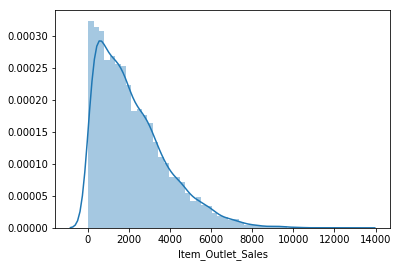

In [6]:
#Item outlet sales

sns.distplot(bigtrain['Item_Outlet_Sales'])

In [7]:
bigtrain.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [8]:
bigtrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
bigtrain['Item_Weight'].isnull().sum()

1463

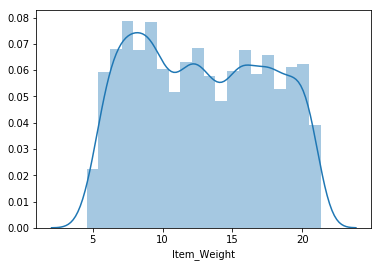

In [10]:
sns.distplot(bigtrain[pd.notnull(bigtrain.Item_Weight)]['Item_Weight'])

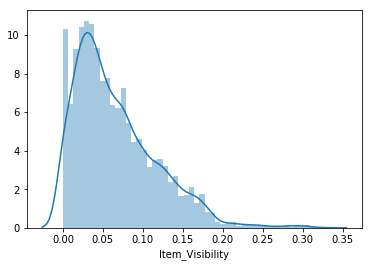

In [11]:
sns.distplot(bigtrain['Item_Visibility'])

In [12]:
bigtrain['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [13]:
bigtrain[bigtrain['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.0,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.1872
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,OUT045,2002,NaN,Tier 2,Supermarket Type1,4604.6728
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,OUT045,2002,NaN,Tier 2,Supermarket Type1,5305.0944


##Observation Item Visibility

It has los of 0s in the data set.

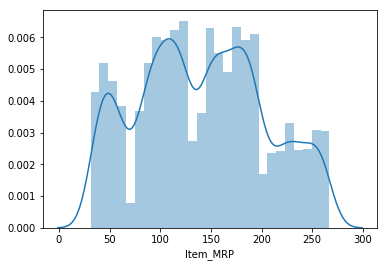

In [14]:
#Item MRP
sns.distplot(bigtrain['Item_MRP'])

### Observation: Item MRP shows 4 different distributions which means it needs transforming of data.

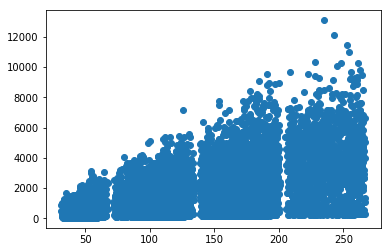

In [15]:
#Item MRP vs Sales
plt.scatter(x=bigtrain['Item_MRP'],y=bigtrain['Item_Outlet_Sales'])

## Univariate Categorical



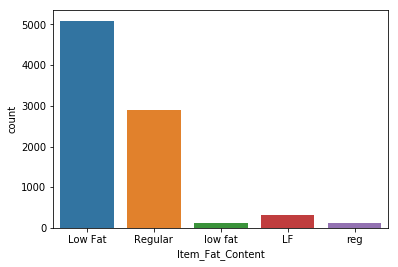

In [16]:
#Item Fat Content
sns.countplot(bigtrain['Item_Fat_Content'])

In [17]:
bigtrain.columns=bigtrain.columns.str.replace(' ',"_")

In [18]:
bigtrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
train=bigtrain.replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'])

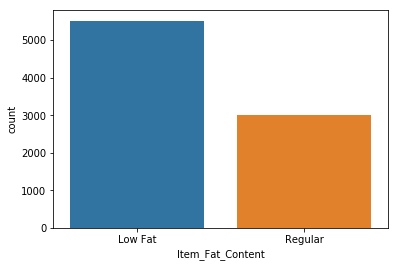

In [20]:
sns.countplot(train['Item_Fat_Content'])

In [21]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:
test=bigtest.replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'])

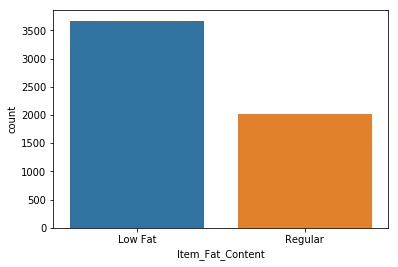

In [23]:
sns.countplot(test['Item_Fat_Content'])

In [24]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

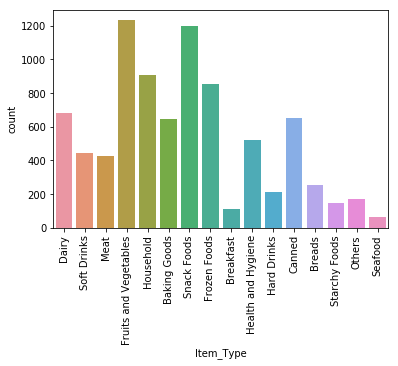

In [25]:
#Item Type
sns.countplot(train['Item_Type'])
plt.xticks(rotation=90)
plt.show()

## Observation: Item Type

1. Fruits and Vegetables
2. Snacks 
3. Frozen Foods
 These are most saleable items

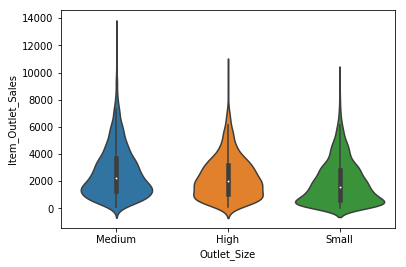

In [26]:
sns.violinplot(x=train['Outlet_Size'],y=train['Item_Outlet_Sales'])

### Bivariate Analysis - Item Visibility and Sales

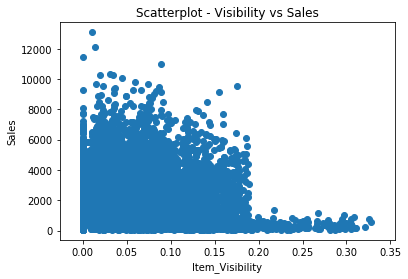

In [27]:
plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'])
plt.xlabel('Item_Visibility')
plt.ylabel('Sales')
plt.title('Scatterplot - Visibility vs Sales')
plt.show()

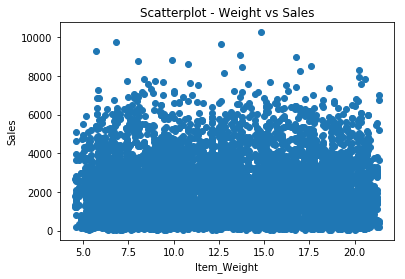

In [28]:
plt.scatter(train['Item_Weight'],train['Item_Outlet_Sales'])
plt.xlabel('Item_Weight')
plt.ylabel('Sales')
plt.title('Scatterplot - Weight vs Sales')
plt.show()

### Observation : Item Weight vs Sales    No Pattern seen

In [29]:
train['Item_Weight'].isnull().sum()

1463

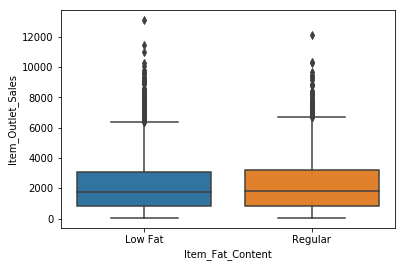

In [30]:
# Item fat content vs sales

sns.boxplot(x='Item_Fat_Content',y="Item_Outlet_Sales",data=train)

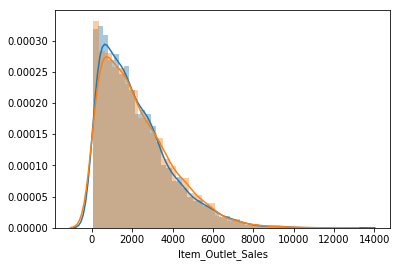

In [31]:
sns.distplot(train[train.Item_Fat_Content=='Low Fat']['Item_Outlet_Sales'])
sns.distplot(train[train.Item_Fat_Content=='Regular']['Item_Outlet_Sales'])

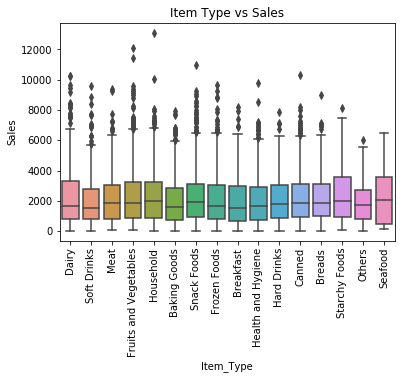

In [32]:
#Item Type vs Sales
sns.boxplot(train['Item_Type'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.xlabel('Item_Type')
plt.ylabel('Sales')
plt.title('Item Type vs Sales')
plt.show()


In [33]:
train['Item_Outlet_Sales'][train['Item_Outlet_Sales']>6000].sum()

2062832.8265999998

In [34]:
print(train[train.Item_Outlet_Sales>7000].Item_Type.unique())

['Canned' 'Frozen Foods' 'Fruits and Vegetables' 'Meat' 'Soft Drinks'
 'Snack Foods' 'Dairy' 'Starchy Foods' 'Baking Goods' 'Hard Drinks'
 'Household' 'Health and Hygiene' 'Breads' 'Breakfast']


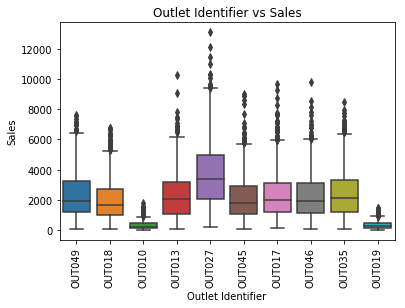

In [35]:
### Identifying the Outlet
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)
plt.xlabel('Outlet Identifier')
plt.ylabel('Sales')
plt.title('Outlet Identifier vs Sales')
plt.show()

Outlet 10 and 19 have lowest sales and Outlet 27 has highest.

In [36]:
train[train['Outlet_Identifier']=='OUT027']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
62,FDF09,NaN,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024
64,FDY45,NaN,Low Fat,0.026016,Snack Foods,255.8356,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.3560
84,FDR12,NaN,Regular,0.031382,Baking Goods,171.3764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.9752
87,FDQ49,NaN,Regular,0.039058,Breakfast,155.9630,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.7230


### Observation- WE have observed that if an outlet is of medium size, it belongs to Tier 3 cities and Supermarket type 3 and has maximum sales. All item types are sold there

In [37]:
train[train['Outlet_Identifier']=='OUT027']['Outlet_Establishment_Year'].unique()

array([1985], dtype=int64)

How old is Outlet 27 - 28 years of existence

In [38]:
train[train['Outlet_Identifier']=='OUT010']['Outlet_Establishment_Year'].unique()

array([1998], dtype=int64)

In [39]:
train[train['Outlet_Identifier']=='OUT010']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
90,FDW20,20.750,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
122,FDB14,20.250,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
133,FDS52,8.890,Low Fat,0.009163,Frozen Foods,101.7016,OUT010,1998,NaN,Tier 3,Grocery Store,101.2016
139,NCN07,18.500,Low Fat,0.056816,Others,132.1284,OUT010,1998,NaN,Tier 3,Grocery Store,263.6568
174,FDI32,17.700,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,NaN,Tier 3,Grocery Store,345.5502


In [40]:
train[(train.Outlet_Size=='Small') & (train.Outlet_Type=='Grocery Store')]['Item_Outlet_Sales'].describe()

count     528.000000
mean      340.329723
std       249.979449
min        33.955800
25%       153.633350
50%       265.321300
75%       460.733600
max      1482.070800
Name: Item_Outlet_Sales, dtype: float64

### Observations Store Type

1. Max Sales is 1500 where as Min is 33


### Missing Values

In [41]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [43]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [44]:
#Outlet size missing values

train.Outlet_Size.fillna(value='Medium',inplace=True)

In [45]:
#Item Weight - Missing Values

In [46]:
train[train['Item_Identifier']=='FDN15']['Item_Weight']

2       17.5
759     17.5
4817    17.5
5074    17.5
6163    17.5
6952     NaN
8349     NaN
Name: Item_Weight, dtype: float64

In [56]:
train['Item_Weight']=train.groupby(train['Item_Identifier'])['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [57]:
test['Item_Weight']=test.groupby(test['Item_Identifier'])['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [58]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [68]:
test['Item_Weight']=test.groupby('Item_Type')['Item_Weight'].transform(lambda x:x.fillna(x.median()))

In [69]:
train.iloc[4187,1]=13.350000

In [70]:
train.iloc[1922,1]=13.150000

In [72]:
train.iloc[5022,1]=11.650000

In [73]:
train.iloc[927,1]=12.850000

## Feature Engineering

1. Item id
2. Price per unit
3. Est. year
4. Item type

In [75]:
train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,0.857143,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [76]:
train.Item_Identifier.unique

<bound method Series.unique of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
5       FDP36
6       FDO10
7       FDP10
8       FDH17
9       FDU28
10      FDY07
11      FDA03
12      FDX32
13      FDS46
14      FDF32
15      FDP49
16      NCB42
17      FDP49
18      DRI11
19      FDU02
20      FDN22
21      FDW12
22      NCB30
23      FDC37
24      FDR28
25      NCD06
26      FDV10
27      DRJ59
28      FDE51
29      FDC14
        ...  
8493    FDP21
8494    NCI54
8495    FDE22
8496    FDJ57
8497    FDT08
8498    NCP54
8499    NCK53
8500    NCQ42
8501    FDW21
8502    NCH43
8503    FDQ44
8504    NCN18
8505    FDB46
8506    DRF37
8507    FDN28
8508    FDW31
8509    FDG45
8510    FDN58
8511    FDF05
8512    FDR26
8513    FDH31
8514    FDA01
8515    FDH24
8516    NCJ19
8517    FDF53
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

In [77]:
itemid=[]
for i in range(0, len(train.Item_Identifier)):
    itemid.append(train.Item_Identifier[i][:2])
    

In [78]:
train['Item_Category']=itemid

In [79]:
itemid=[]
for i in range(0, len(test.Item_Identifier)):
    itemid.append(test.Item_Identifier[i][:2])

    
test['Item_Category']=itemid

In [80]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [81]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,FD
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NC
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,FD
4,FDY38,0.750,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD


In [82]:
train['Existence']=2013-train.Outlet_Establishment_Year

In [83]:
test['Existence']=2013-train.Outlet_Establishment_Year

In [84]:
train['Item_Visibility'].replace(to_replace=0,value=0.053931,inplace=True)

In [86]:
#Replacing
train.Item_Weight.replace(to_replace=0,value=11,inplace=True)

In [87]:
test.Item_Weight.replace(to_replace=0,value=11,inplace=True)

In [88]:
#Price Per Unit
train['Price_Per_Unit']=train.Item_MRP/train.Item_Weight

In [94]:
test['Price_Per_Unit']=test.Item_MRP/test.Item_Weight

In [93]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Existence,Price_Per_Unit
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,26.861204
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,8.153581
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,8.092457
3,FDX07,19.200000,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,15,9.484115
4,NCD19,8.930000,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,6.031512
5,FDP36,10.395000,Regular,0.053931,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,4,4.944762
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD,26,4.224088
7,FDP10,0.857143,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD,28,125.722567
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,FD,11,5.985963
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,FD,6,9.782365


In [100]:
#Perishables
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [101]:
perishables=['Dairy', 'Meat', 'Fruits and Vegetables',
         'Frozen Foods',
       'Breakfast', 'Hard Drinks',
       'Breads', 'Seafood']

In [102]:
# Where it matches the list of perishables,'Perishables' else 'Non Perishables'

In [104]:
train['ItemType_Cat']=np.where(train.Item_Type.isin(perishables),'Perishables','Non Perishables')

In [105]:
test['ItemType_Cat']=np.where(test.Item_Type.isin(perishables),'Perishables','Non Perishables')

In [109]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Existence,Price_Per_Unit,ItemType_Cat
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,26.861204,Perishables
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,8.153581,Non Perishables
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,8.092457,Perishables
3,FDX07,19.200000,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,15,9.484115,Perishables
4,NCD19,8.930000,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,6.031512,Non Perishables
5,FDP36,10.395000,Regular,0.053931,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,4,4.944762,Non Perishables
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD,26,4.224088,Non Perishables
7,FDP10,0.857143,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD,28,125.722567,Non Perishables
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,FD,11,5.985963,Perishables
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,FD,6,9.782365,Perishables


In [106]:
train.shape

(8523, 16)

In [107]:
test.shape

(5681, 15)

In [108]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Category', 'Existence',
       'Price_Per_Unit', 'ItemType_Cat'],
      dtype='object')

In [ ]:
test.columns

In [ ]:
train['Item_Weight'].isnull().sum()

In [ ]:
#Droping columns

In [110]:
newtrain=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1)

In [111]:
newtest=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1)

In [116]:
newtrain

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Existence,Price_Per_Unit,ItemType_Cat
0,9.300000,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,26.861204,Perishables
1,5.920000,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,8.153581,Non Perishables
2,17.500000,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,8.092457,Perishables
3,19.200000,Regular,0.053931,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,15,9.484115,Perishables
4,8.930000,Low Fat,0.053931,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26,6.031512,Non Perishables
5,10.395000,Regular,0.053931,51.4008,Medium,Tier 3,Supermarket Type2,556.6088,FD,4,4.944762,Non Perishables
6,13.650000,Regular,0.012741,57.6588,High,Tier 3,Supermarket Type1,343.5528,FD,26,4.224088,Non Perishables
7,0.857143,Low Fat,0.127470,107.7622,Medium,Tier 3,Supermarket Type3,4022.7636,FD,28,125.722567,Non Perishables
8,16.200000,Regular,0.016687,96.9726,Medium,Tier 2,Supermarket Type1,1076.5986,FD,11,5.985963,Perishables
9,19.200000,Regular,0.094450,187.8214,Medium,Tier 2,Supermarket Type1,4710.5350,FD,6,9.782365,Perishables


In [113]:
newtest.shape

(5681, 11)

##Applying Encoding

Label encoding because data follows a certain order. Otherwise we use One hot encoding

In [117]:
dummy_train=pd.get_dummies(newtrain)
dummy_test=pd.get_dummies(newtest)

In [119]:
dummy_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Existence,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC,ItemType_Cat_Non Perishables,ItemType_Cat_Perishables
0,9.300000,0.016047,249.8092,3735.1380,14,26.861204,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,5.920000,0.019278,48.2692,443.4228,4,8.153581,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
2,17.500000,0.016760,141.6180,2097.2700,14,8.092457,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,19.200000,0.053931,182.0950,732.3800,15,9.484115,0,1,0,1,...,1,1,0,0,0,0,1,0,0,1
4,8.930000,0.053931,53.8614,994.7052,26,6.031512,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
5,10.395000,0.053931,51.4008,556.6088,4,4.944762,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
6,13.650000,0.012741,57.6588,343.5528,26,4.224088,0,1,1,0,...,1,0,1,0,0,0,1,0,1,0
7,0.857143,0.127470,107.7622,4022.7636,28,125.722567,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
8,16.200000,0.016687,96.9726,1076.5986,11,5.985963,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
9,19.200000,0.094450,187.8214,4710.5350,6,9.782365,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
#Applying Standard Scaler

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
sc=StandardScaler()

In [122]:
scaled_train=pd.DataFrame(sc.fit_transform(dummy_train),columns=dummy_train.columns)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [123]:
scaled_test=pd.DataFrame(sc.fit_transform(dummy_test),columns=dummy_test.columns)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [124]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [127]:
x= scaled_train.drop('Item_Outlet_Sales',axis=1)
y=scaled_train.Item_Outlet_Sales

In [129]:
m1=rf.fit(x,y)

In [130]:
pred=m1.predict(scaled_test)

In [131]:
###Conversion of Scaled value into original value

In [133]:
#Applying Standard Scaler

mysales=sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))

In [135]:
#Inverse Transform

sales=sc.inverse_transform(pred)

In [136]:
#Preparing Data for subission

In [137]:
solution=pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':sales})

In [138]:
#Exporting the solution in csv

solution.to_csv('Random forest model.csv',index=False)

In [142]:
from sklearn.tree import DecisionTreeRegressor
dtree= DecisionTreeRegressor()

In [145]:
pred_tree=dtree.fit(x,y).predict(scaled_test)

In [149]:
sales2=sc.inverse_transform(pred_tree)

In [150]:
solution2=pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':sales})

In [151]:
solution.to_csv('Decision tree model.csv',index=False)